In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import pm4py
import numpy as np
import datetime
pd.set_option("display.max_rows", None)
from collections import Counter
import operator
import pickle
import time
import tensorflow as tf
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [106]:
df = pd.read_csv('BPI_Challenge_2012.xes.gz_UNPACKED.csv', index_col=[0])
start = time.time()
df.drop(columns=['org:resource'], inplace=True)
df['next_event'] = df['concept:name'].shift(-1)
df['previous_event'] = df['concept:name'].shift(1)
df['pp_event'] = df['concept:name'].shift(2)
df['ppp_event'] = df['concept:name'].shift(3)
df['p_lifecycle:transition'] = df['lifecycle:transition'].shift(1)
df['next_case'] = df['case:concept:name'].shift(-1).fillna(0)
df['next_case1'] = df['next_case'].shift(-1).fillna(0)
# df = df[df['case:concept:name'] == df['next_case1']]
df['datetime'] = pd.to_datetime(df['time:timestamp'], errors='coerce', utc=True)
df['weekday'] = df['datetime'].dt.weekday
df['hour'] =  df['datetime'].dt.hour
df['minute'] =  df['datetime'].dt.minute
df['month'] =  df['datetime'].dt.month
df['next_datetime'] = df['datetime'].shift(-1)
df['timedelta'] = (df['next_datetime'] - df['datetime']).astype('timedelta64[s]')

print(len(df))
df = df[(df['case:concept:name'].astype(int)) == (df['next_case'].astype(int))]
df['previous_timedelta'] = df['timedelta'].shift(1)
print(len(df))
df.dropna(inplace=True)
#df = df.iloc[:20000]
df.iloc[:10]
dfxx = df[['hour', 'minute', 'previous_timedelta']]
dfx = df[['concept:name', 'previous_event', 'lifecycle:transition', 'pp_event', 'ppp_event', 'p_lifecycle:transition', 'weekday', 'month']]
dfy = df[['timedelta']]

valy = dfy
dummies = pd.get_dummies(dfx.astype('str'))
dfx = dfxx.join(dummies)
#dfx = dummies.join(df[['day, hour', 'minute', 'month']])
trainlen = int(len(df)*0.8)
# dfx.iloc[:10]
# dfx = dfx.to_numpy()
# dfy = dfy.to_numpy()
x_train, y_train = dfx[:trainlen], dfy[:trainlen]
x_test, y_test = dfx[trainlen:], dfy[trainlen:]
valy = y_test
#print(x_train.iloc[:10])
columns = y_train.columns
x_train = tf.convert_to_tensor(x_train)
y_train = tf.convert_to_tensor(y_train)
x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test)
print(len(df))
df.iloc[20:100]

262200
249113
249110


,lifecycle:transition,concept:name,time:timestamp,case:REG_DATE,case:concept:name,case:AMOUNT_REQ,next_event,previous_event,pp_event,ppp_event,p_lifecycle:transition,next_case,next_case1,datetime,weekday,hour,minute,month,next_datetime,timedelta,previous_timedelta
23,COMPLETE,O_ACCEPTED,2011-10-13 10:37:29.226000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000,A_ACTIVATED,A_APPROVED,A_REGISTERED,W_Valideren aanvraag,COMPLETE,173688.0,173688.0,2011-10-13 08:37:29.226000+00:00,3,8,37,10,2011-10-13 08:37:29.226000+00:00,0.0,0.0
24,COMPLETE,A_ACTIVATED,2011-10-13 10:37:29.226000+02:00,2011-10-01 00:38:44.546000+02:00,173688,20000,W_Valideren aanvraag,O_ACCEPTED,A_APPROVED,A_REGISTERED,COMPLETE,173688.0,173691.0,2011-10-13 08:37:29.226000+00:00,3,8,37,10,2011-10-13 08:37:37.026000+00:00,7.0,0.0
26,COMPLETE,A_SUBMITTED,2011-10-01 08:08:58.256000+02:00,2011-10-01 08:08:58.256000+02:00,173691,5000,A_PARTLYSUBMITTED,W_Valideren aanvraag,A_ACTIVATED,O_ACCEPTED,COMPLETE,173691.0,173691.0,2011-10-01 06:08:58.256000+00:00,5,6,8,10,2011-10-01 06:09:02.195000+00:00,3.0,7.0
27,COMPLETE,A_PARTLYSUBMITTED,2011-10-01 08:09:02.195000+02:00,2011-10-01 08:08:58.256000+02:00,173691,5000,A_PREACCEPTED,A_SUBMITTED,W_Valideren aanvraag,A_ACTIVATED,COMPLETE,173691.0,173691.0,2011-10-01 06:09:02.195000+00:00,5,6,9,10,2011-10-01 06:09:56.648000+00:00,54.0,3.0
28,COMPLETE,A_PREACCEPTED,2011-10-01 08:09:56.648000+02:00,2011-10-01 08:08:58.256000+02:00,173691,5000,W_Completeren aanvraag,A_PARTLYSUBMITTED,A_SUBMITTED,W_Valideren aanvraag,COMPLETE,173691.0,173691.0,2011-10-01 06:09:56.648000+00:00,5,6,9,10,2011-10-01 06:09:59.578000+00:00,2.0,54.0
29,SCHEDULE,W_Completeren aanvraag,2011-10-01 08:09:59.578000+02:00,2011-10-01 08:08:58.256000+02:00,173691,5000,W_Completeren aanvraag,A_PREACCEPTED,A_PARTLYSUBMITTED,A_SUBMITTED,COMPLETE,173691.0,173691.0,2011-10-01 06:09:59.578000+00:00,5,6,9,10,2011-10-01 09:37:32.393000+00:00,12452.0,2.0
30,START,W_Completeren aanvraag,2011-10-01 11:37:32.393000+02:00,2011-10-01 08:08:58.256000+02:00,173691,5000,W_Completeren aanvraag,W_Completeren aanvraag,A_PREACCEPTED,A_PARTLYSUBMITTED,SCHEDULE,173691.0,173691.0,2011-10-01 09:37:32.393000+00:00,5,9,37,10,2011-10-01 09:43:13.178000+00:00,340.0,12452.0
31,COMPLETE,W_Completeren aanvraag,2011-10-01 11:43:13.178000+02:00,2011-10-01 08:08:58.256000+02:00,173691,5000,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,A_PREACCEPTED,START,173691.0,173691.0,2011-10-01 09:43:13.178000+00:00,5,9,43,10,2011-10-01 12:27:57.775000+00:00,9884.0,340.0
32,START,W_Completeren aanvraag,2011-10-01 14:27:57.775000+02:00,2011-10-01 08:08:58.256000+02:00,173691,5000,A_ACCEPTED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,COMPLETE,173691.0,173691.0,2011-10-01 12:27:57.775000+00:00,5,12,27,10,2011-10-01 12:33:54.614000+00:00,356.0,9884.0
33,COMPLETE,A_ACCEPTED,2011-10-01 14:33:54.614000+02:00,2011-10-01 08:08:58.256000+02:00,173691,5000,A_FINALIZED,W_Completeren aanvraag,W_Completeren aanvraag,W_Completeren aanvraag,START,173691.0,173691.0,2011-10-01 12:33:54.614000+00:00,5,12,33,10,2011-10-01 12:35:46.016000+00:00,111.0,356.0


In [107]:

#dfx.iloc[:10]
x_test

<tf.Tensor: shape=(49822, 119), dtype=float64, numpy=
array([[1.8000e+01, 8.0000e+00, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.8000e+01, 8.0000e+00, 1.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.9000e+01, 3.0000e+00, 3.2690e+03, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [2.2000e+01, 5.2000e+01, 4.3000e+01, ..., 1.0000e+00, 0.0000e+00,
        0.0000e+00],
       [8.0000e+00, 2.6000e+01, 3.4485e+04, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [8.0000e+00, 2.7000e+01, 5.0000e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00]])>

In [108]:
y_test[:1]

<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[1.]])>

In [109]:
df=df.iloc[:20000]
#df['datetime'] = pd.to_datetime(df['time:timestamp'], errors='raise', format='%Y-%m-%d %H:%M:%S%z')
df.info()
df['datetime'] = pd.to_datetime(df['datetime'], utc=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 3 to 20958
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   lifecycle:transition    20000 non-null  object             
 1   concept:name            20000 non-null  object             
 2   time:timestamp          20000 non-null  object             
 3   case:REG_DATE           20000 non-null  object             
 4   case:concept:name       20000 non-null  int64              
 5   case:AMOUNT_REQ         20000 non-null  int64              
 6   next_event              20000 non-null  object             
 7   previous_event          20000 non-null  object             
 8   pp_event                20000 non-null  object             
 9   ppp_event               20000 non-null  object             
 10  p_lifecycle:transition  20000 non-null  object             
 11  next_case               20000 non-null  f

In [110]:
# s = df['datetime']
# s3 = pd.to_datetime(s, infer_datetime_format=True)

In [111]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [112]:
y_train[:1]

<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[39427.]])>

In [113]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(119,1)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(228, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(48, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(36, activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(1)
])

In [114]:
predictions = model(x_train[:1]).numpy()
predictions

array([[4.6944556]], dtype=float32)

In [115]:
tf.nn.softmax(predictions).numpy()

array([[1.]], dtype=float32)

In [116]:
loss_fn = tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

In [117]:
loss_fn(y_train[:1], predictions).numpy()

1554118100.0

In [118]:
model.compile(optimizer='Adamax',
              loss=loss_fn,
              metrics=['mean_absolute_error'])

In [119]:
model.fit(x_train, y_train, epochs=6, batch_size=256)

Epoch 1/6
779/779 [==============================] - 15s 18ms/step - loss: 25243658240.0000 - mean_absolute_error: 40226.8516
Epoch 2/6
779/779 [==============================] - 13s 16ms/step - loss: 25234634752.0000 - mean_absolute_error: 40210.5273
Epoch 3/6
779/779 [==============================] - 13s 17ms/step - loss: 25220810752.0000 - mean_absolute_error: 40187.0547
Epoch 4/6
779/779 [==============================] - 13s 17ms/step - loss: 25202122752.0000 - mean_absolute_error: 40160.1758
Epoch 5/6
779/779 [==============================] - 13s 17ms/step - loss: 25178576896.0000 - mean_absolute_error: 40132.0898
Epoch 6/6
779/779 [==============================] - 13s 17ms/step - loss: 25150916608.0000 - mean_absolute_error: 40104.9883


In [120]:
model.evaluate(x_test,  y_test, verbose=2)

1557/1557 - 7s - loss: 18457794560.0000 - mean_absolute_error: 34674.9375 - 7s/epoch - 4ms/step


[18457794560.0, 34674.9375]

In [123]:
predictions = model(x_test).numpy()
predictions[30:500]

array([[ 127.716736],
       [ 128.0129  ],
       [ 194.99193 ],
       [ 132.66183 ],
       [ 132.38065 ],
       [ 121.11546 ],
       [ 130.16705 ],
       [ 126.80097 ],
       [ 122.46501 ],
       [ 146.09708 ],
       [ 124.559235],
       [ 136.19505 ],
       [ 131.17622 ],
       [ 131.03952 ],
       [ 132.87079 ],
       [ 125.92908 ],
       [ 129.30882 ],
       [ 139.49771 ],
       [ 128.16904 ],
       [ 147.35533 ],
       [ 125.24256 ],
       [ 122.20614 ],
       [ 127.371704],
       [ 130.23398 ],
       [ 121.218475],
       [ 136.90225 ],
       [ 121.20053 ],
       [ 136.26381 ],
       [ 138.81992 ],
       [ 127.655136],
       [ 124.361786],
       [ 126.1132  ],
       [ 129.3608  ],
       [ 127.03392 ],
       [ 230.77954 ],
       [ 125.33462 ],
       [ 218.15741 ],
       [ 131.15698 ],
       [ 126.12518 ],
       [ 124.44441 ],
       [ 126.97884 ],
       [ 125.08141 ],
       [ 132.01569 ],
       [ 129.8239  ],
       [1663.4512  ],
       [ 1

In [124]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [125]:
tf.nn.softmax(model.predict(x_train[:2]))

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

In [126]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 119)               0         
                                                                 
 batch_normalization_17 (Bat  (None, 119)              476       
 chNormalization)                                                
                                                                 
 dense_17 (Dense)            (None, 228)               27360     
                                                                 
 batch_normalization_18 (Bat  (None, 228)              912       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 228)               0         
                                                                 
 dense_18 (Dense)            (None, 128)              

In [127]:
data = tf.nn.softmax(predictions).numpy()
columns

Index(['timedelta'], dtype='object')

In [22]:
df = pd.DataFrame(data, columns=columns)
print(len(df))
df.dropna(inplace=True)
print(len(df))

52440
52440


In [23]:
predictions = pd.DataFrame(df.idxmax(axis=1), columns = ['prediction'])

In [24]:
validation = pd.DataFrame(valy.idxmax(axis=1), columns=['actual'])

In [25]:
validation.reset_index(inplace=True)

In [26]:
results = validation.join(predictions)

In [27]:
results.iloc[:10]

,index,actual,prediction
0,209760,next_event_W_Valideren aanvraag,next_event_W_Valideren aanvraag
1,209761,next_event_W_Nabellen offertes,next_event_W_Nabellen offertes
2,209762,next_event_W_Valideren aanvraag,next_event_W_Valideren aanvraag
3,209763,next_event_O_ACCEPTED,next_event_W_Valideren aanvraag
4,209764,next_event_A_APPROVED,next_event_A_REGISTERED
5,209765,next_event_A_REGISTERED,next_event_A_REGISTERED
6,209766,next_event_A_ACTIVATED,next_event_A_ACTIVATED
7,209767,next_event_W_Valideren aanvraag,next_event_W_Valideren aanvraag
8,209768,next_event_A_SUBMITTED,next_event_A_SUBMITTED
9,209769,next_event_A_PARTLYSUBMITTED,next_event_A_PARTLYSUBMITTED


In [28]:
same=0
diff = 0
for value, row in results.iterrows():
    if row['prediction'] == row['actual']:
        same += 1
    else: diff += 1
accuracy = same / (diff+same) *100
accuracy

84.12662090007628

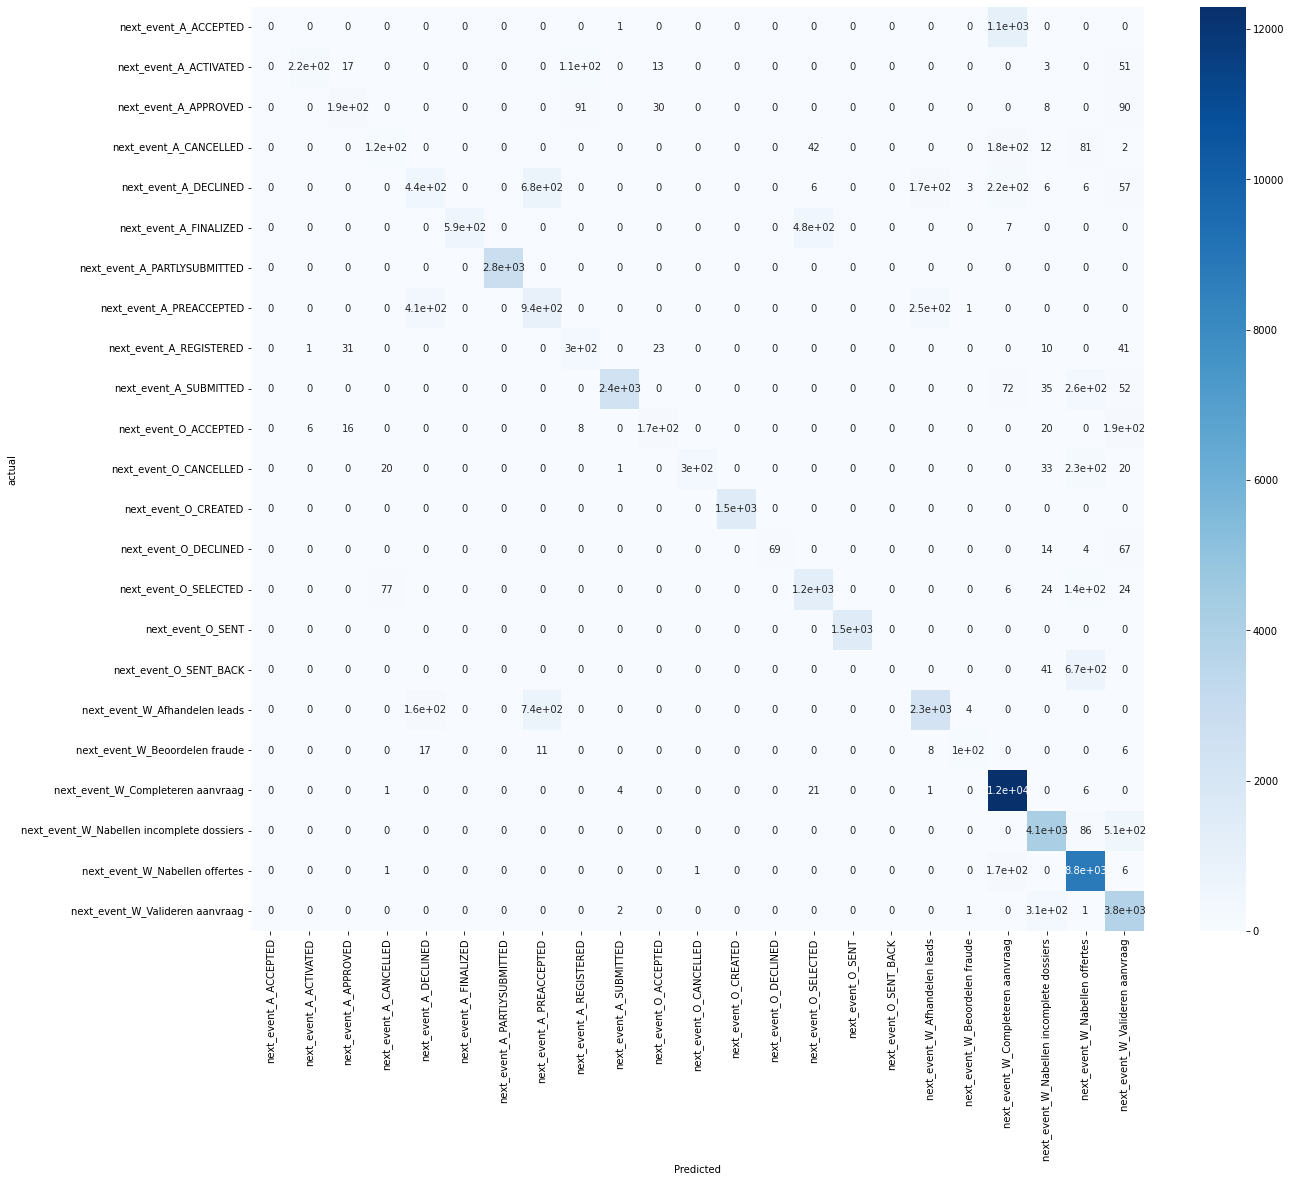

In [29]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
y_test = results['actual']
y_pred = results['prediction']
labels = list(np.unique(results['actual']))
a =  confusion_matrix(y_test, y_pred, labels=labels)
fig, ax = plt.subplots(figsize=(20,17)) 

cmd = pd.DataFrame(a, index=labels, columns=labels)
sns.heatmap(cmd, annot=True, cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('actual')
fig.savefig('confusionmatrix.png', dpi=300)


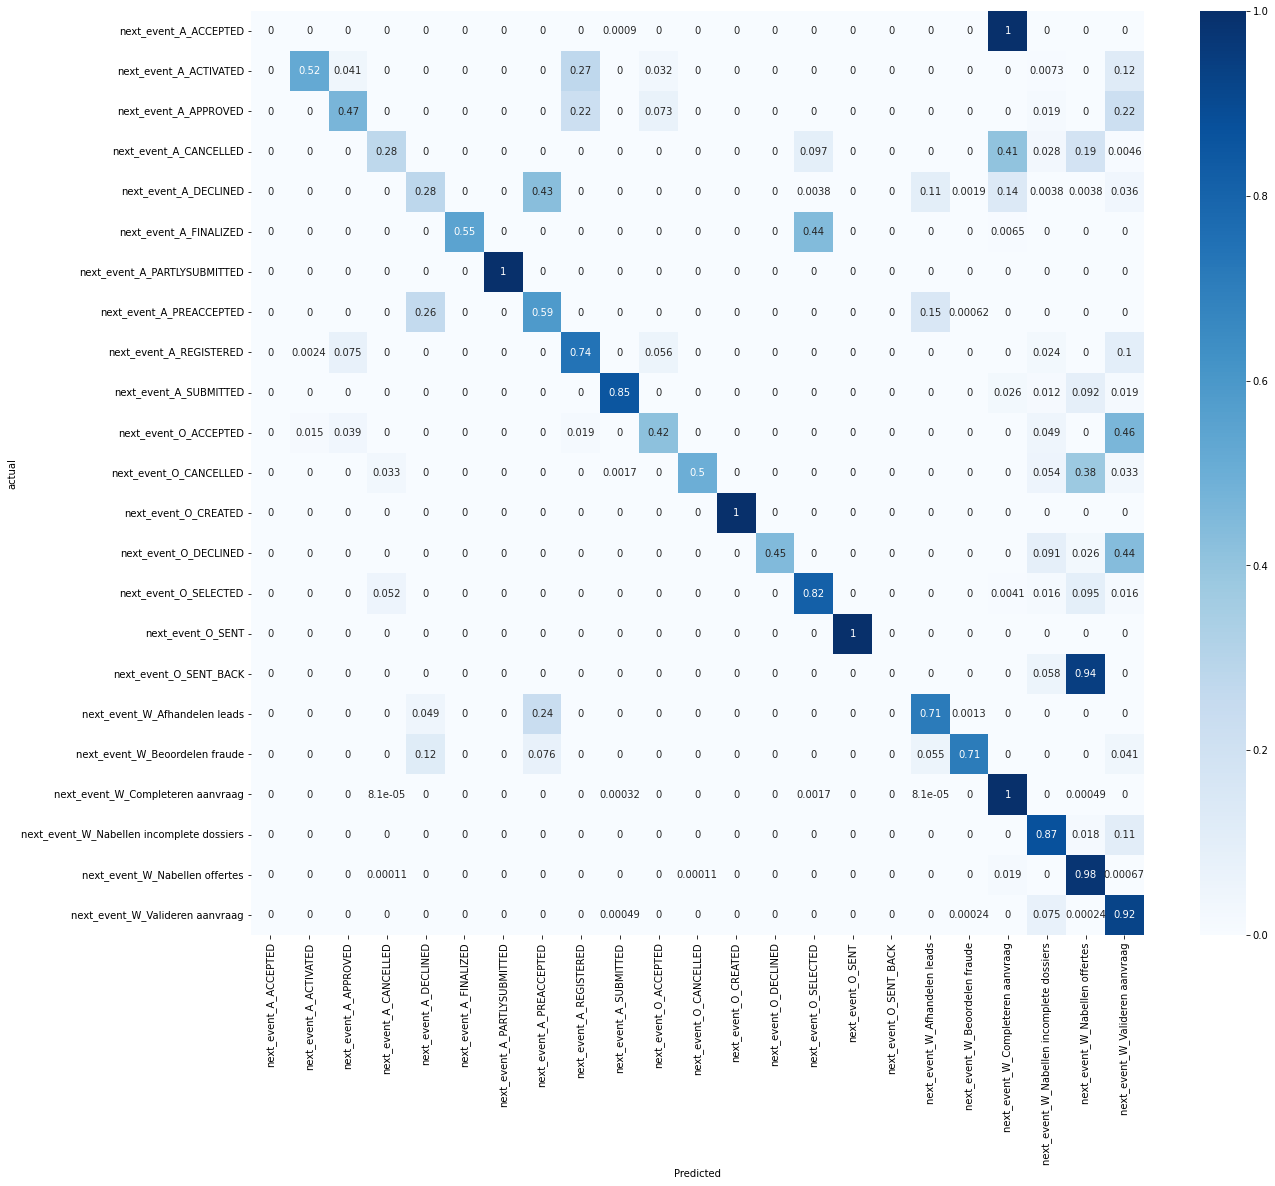

In [30]:
cmdn = cmd.div(cmd.sum(axis=1), axis=0)
cmdn
fig, ax = plt.subplots(figsize=(20,17)) 
sns.heatmap(cmdn, annot=True, cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('actual')
fig.savefig('norm_confusion_matrix.png', dpi=300)

In [31]:
end = time.time()
total_time = end-start
print(total_time)

81.73188757896423
